## Cifar: Neuronales Netz bauen

https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

import numpy as np

X_train = X_train.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

[4]


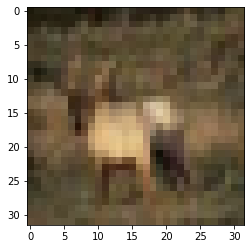

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_train[3])
plt.imshow(X_train[3])
plt.show()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [7]:
y_train_car = y_train == 1

model.fit(X_train, y_train_car, batch_size=128, epochs=10, shuffle=True)

Epoch 1/10
391/391 [==============================] - 12s 29ms/step - loss: 0.3169 - accuracy: 0.8872
Epoch 2/10
391/391 [==============================] - 12s 31ms/step - loss: 0.1922 - accuracy: 0.9207
Epoch 3/10
391/391 [==============================] - 12s 32ms/step - loss: 0.1738 - accuracy: 0.9340
Epoch 4/10
391/391 [==============================] - 12s 31ms/step - loss: 0.1604 - accuracy: 0.9405
Epoch 5/10
391/391 [==============================] - 12s 31ms/step - loss: 0.1504 - accuracy: 0.9454
Epoch 6/10
391/391 [==============================] - 13s 32ms/step - loss: 0.1390 - accuracy: 0.9496
Epoch 7/10
391/391 [==============================] - 12s 32ms/step - loss: 0.1312 - accuracy: 0.9546
Epoch 8/10
391/391 [==============================] - 12s 32ms/step - loss: 0.1232 - accuracy: 0.9594
Epoch 9/10
391/391 [==============================] - 12s 32ms/step - loss: 0.1132 - accuracy: 0.9611
Epoch 10/10
391/391 [==============================] - 12s 31ms/step - loss: 0.106

In [24]:
print(model.evaluate(X_train, y_train_car))

50000/50000 [==============================] - 4s 86us/step
[0.0801772673407197, 0.97082]


In [25]:
y_test_car = y_test == 1
print(model.evaluate(X_test, y_test_car))

10000/10000 [==============================] - 1s 86us/step
[0.13696064681261777, 0.9522]
